# Introducción a scikit-learn

## Importamos las librerías a utilizar

In [7]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as stats

In [8]:
%matplotlib inline
matplotlib.style.use('ggplot')
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)  # Para evitar warnings en la generación de algunas gráficas

## Definimos variables globales

In [9]:
DATASET_NAME = 'toyExampleMissing.data'
DATASET_DELIMITER = ','

## Leemos el fichero de datos

In [10]:
dataset = pd.read_csv(DATASET_NAME, 
                      delimiter=DATASET_DELIMITER,
                      skiprows=0,
                      header=None,
                      names = ["X0", "X1", "Y"])
dataset

,X0,X1,Y
0,-1,5,0
1,-2,3,0
2,-1,0,0
3,-1,-2,0
4,-3,-4,0
5,1,NaN,1
6,2,3,1
7,1,0,1
8,1,-2,1
9,3,-4,1


## Gestión de valores faltantes

In [11]:
imp = SimpleImputer(missing_values=np.nan, fill_value='mean')
imp = imp.fit(dataset)

dataset_prep = imp.transform(dataset)

dataset_prep

array([[-1.        ,  5.        ,  0.        ],
       [-2.        ,  3.        ,  0.        ],
       [-1.        ,  0.        ,  0.        ],
       [-1.        , -2.        ,  0.        ],
       [-3.        , -4.        ,  0.        ],
       [ 1.        , -0.11111111,  1.        ],
       [ 2.        ,  3.        ,  1.        ],
       [ 1.        ,  0.        ,  1.        ],
       [ 1.        , -2.        ,  1.        ],
       [ 3.        , -4.        ,  1.        ]])

Nótese que `SimpleImputer` ha convertido los valores a un array NumPy. Convertimos de nuevo a formato dataframe para seguir visualizándolos en un formato más adecuado

In [12]:
dataset = pd.DataFrame(dataset_prep,
                       columns=dataset.columns,
                       index=dataset.index)

dataset

,X0,X1,Y
0,-1.0,5.000000,0.0
1,-2.0,3.000000,0.0
2,-1.0,0.000000,0.0
3,-1.0,-2.000000,0.0
4,-3.0,-4.000000,0.0
5,1.0,-0.111111,1.0
6,2.0,3.000000,1.0
7,1.0,0.000000,1.0
8,1.0,-2.000000,1.0
9,3.0,-4.000000,1.0


## Separación de variables predictoras y dependientes

In [13]:
dataset_X = dataset.loc[:, 'X0':'X1'].astype(float)
dataset_Y = dataset.loc[:, 'Y']

dataset_X

,X0,X1
0,-1.0,5.000000
1,-2.0,3.000000
2,-1.0,0.000000
3,-1.0,-2.000000
4,-3.0,-4.000000
5,1.0,-0.111111
6,2.0,3.000000
7,1.0,0.000000
8,1.0,-2.000000
9,3.0,-4.000000


In [14]:
dataset_Y

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: Y, dtype: float64

## Estandarización de los datos

In [15]:
scaler = StandardScaler()
scaler.fit(dataset_X)

dataset_X_scaled = scaler.transform(dataset_X)  # Como es un problema de clasificación, sólo estandarizamos las X

dataset_X_scaled

array([[-5.59016994e-01,  1.77528124e+00],
       [-1.11803399e+00,  1.08060597e+00],
       [-5.59016994e-01,  3.85930704e-02],
       [-5.59016994e-01, -6.56082197e-01],
       [-1.67705098e+00, -1.35075746e+00],
       [ 5.59016994e-01, -9.64055595e-18],
       [ 1.11803399e+00,  1.08060597e+00],
       [ 5.59016994e-01,  3.85930704e-02],
       [ 5.59016994e-01, -6.56082197e-01],
       [ 1.67705098e+00, -1.35075746e+00]])

Estos son los valores con los que hemos estandarizado:

In [16]:
print("mean [X0, X1]: {}\n std [X0, X1]: {}".format(scaler.mean_, scaler.scale_))

mean [X0, X1]: [ 0.         -0.11111111]
 std [X0, X1]: [1.78885438 2.87904305]


## Operaciones básicas con matrices NumPy

### Crear y apilar matrices

In [17]:
a = np.array ([1, 2, 3, 4])
b = np.array ([5, 6, 7, 8])

c = np.vstack([a, b])
c

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

### Seleccionar parte de las columnas

In [18]:
d = c[:,[1, 3]]
d

array([[2, 4],
       [6, 8]])

## Representación gráfica

In [19]:
DATASET_NAME = 'bloodTransfusion.data'
DATASET_DELIMITER = ','

In [20]:
dataset = pd.read_csv(DATASET_NAME,
                      delimiter=DATASET_DELIMITER,
                      skiprows=1,
                      header=None,
                      names = ["Recency", "Frequency", "Monetary", "Time", "MarchDonor"])
dataset

,Recency,Frequency,Monetary,Time,MarchDonor
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


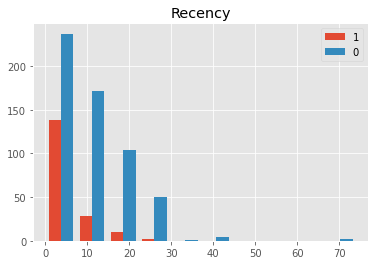

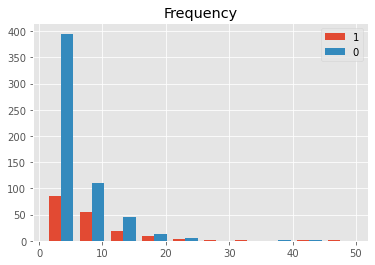

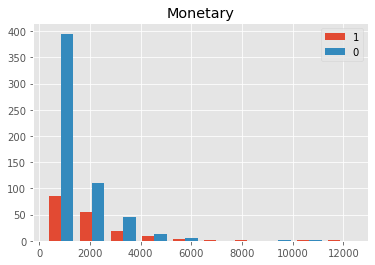

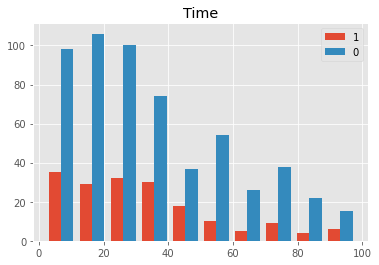

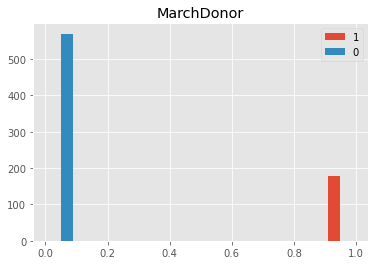

In [21]:
for column in dataset:  # Visualizamos la distribución de variables por clases
    plt.title(column)
    plt.hist([dataset[dataset['MarchDonor'] == 1][column], dataset[dataset['MarchDonor'] == 0][column]], label=['1', '0'])
    plt.legend(loc='upper right')
    plt.show()

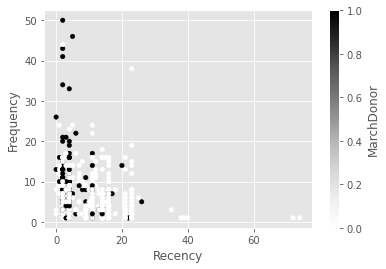

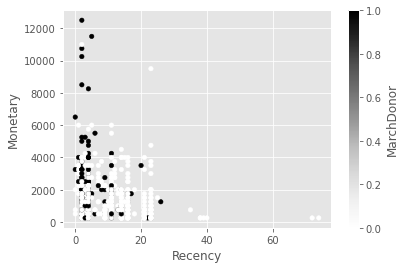

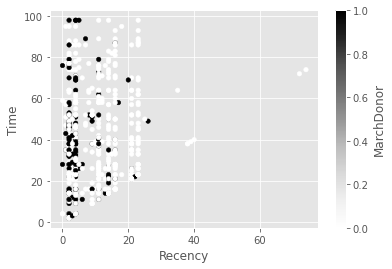

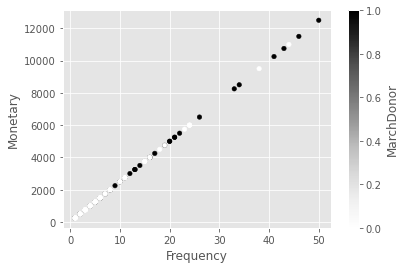

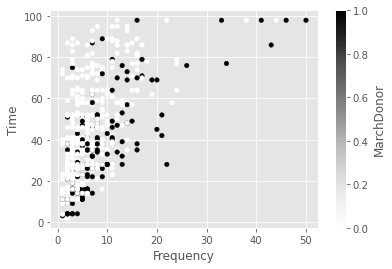

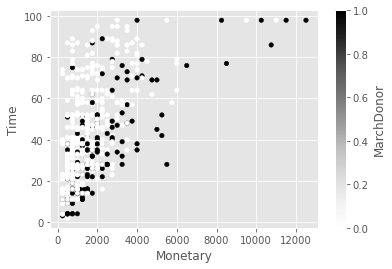

In [22]:
# Ahora representamos atributos por pares (mostrando también la clase)
column_names = dataset.columns[:-1]  # Omitimos la variable dependiente
for i, columna_i in enumerate(column_names):
    for j, columna_j in enumerate(column_names):
        if i &lt; j:
            fig, ax = plt.subplots()
            dataset.plot.scatter(columna_i, columna_j, c='MarchDonor', ax=ax)